In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [11]:
import os
general_path = '../input/gtzan-dataset-music-genre-classification/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['disco', 'metal', 'reggae', 'blues', 'rock', 'classical', 'jazz', 'hiphop', 'country', 'pop']


In [12]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [13]:
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


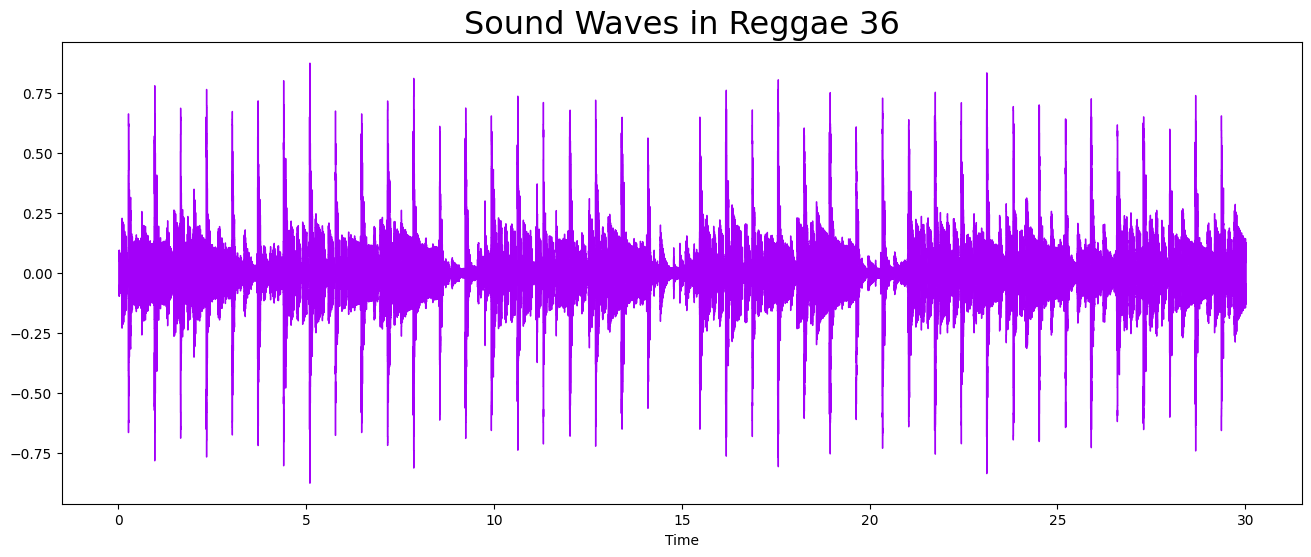

In [14]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae 36", fontsize = 23);

In [15]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


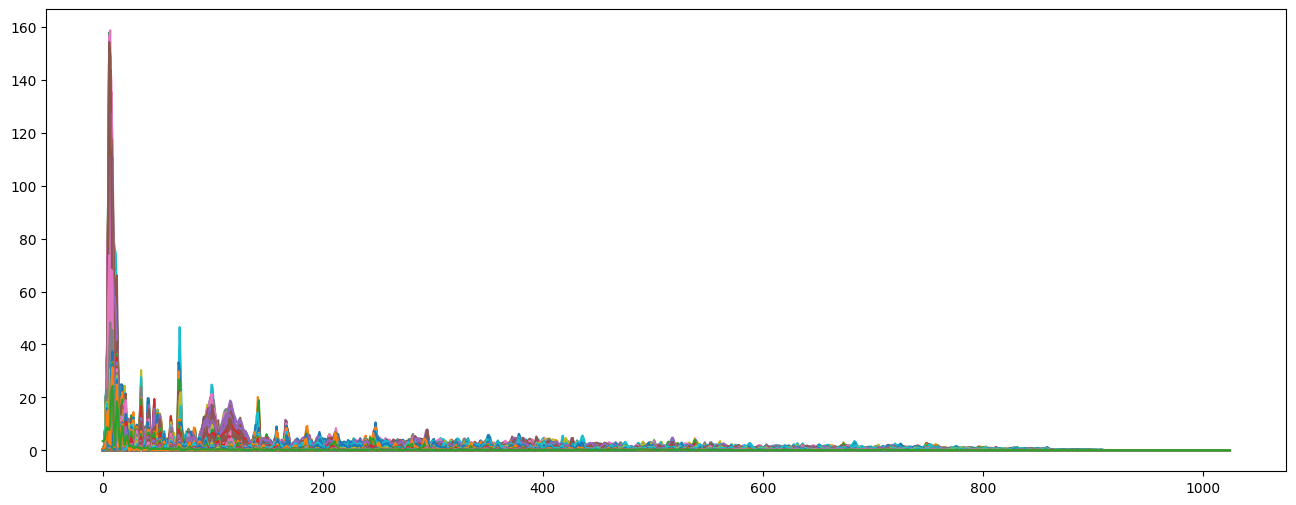

In [16]:
plt.figure(figsize = (16, 6))
plt.plot(D);

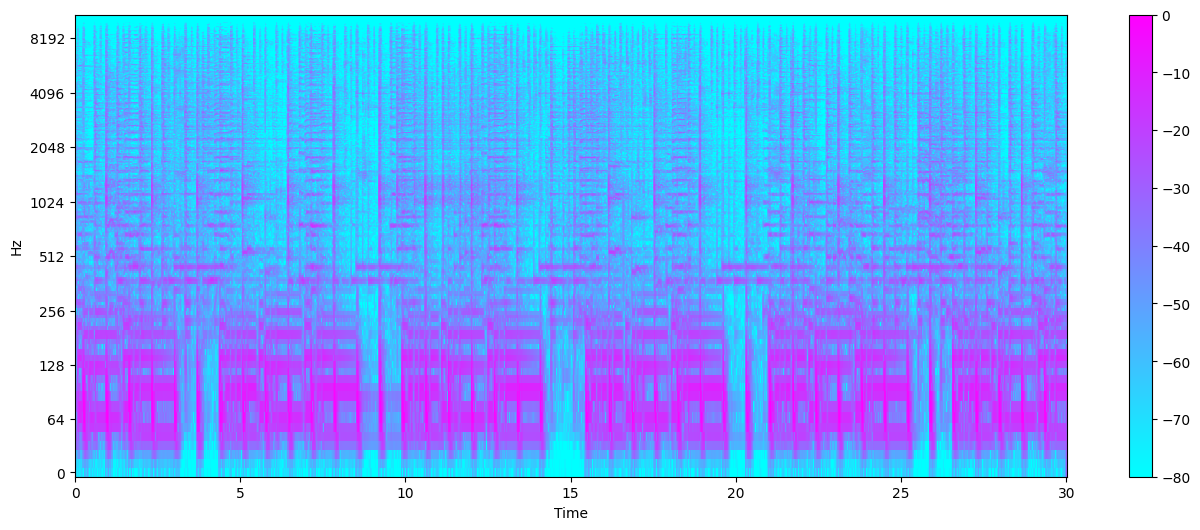

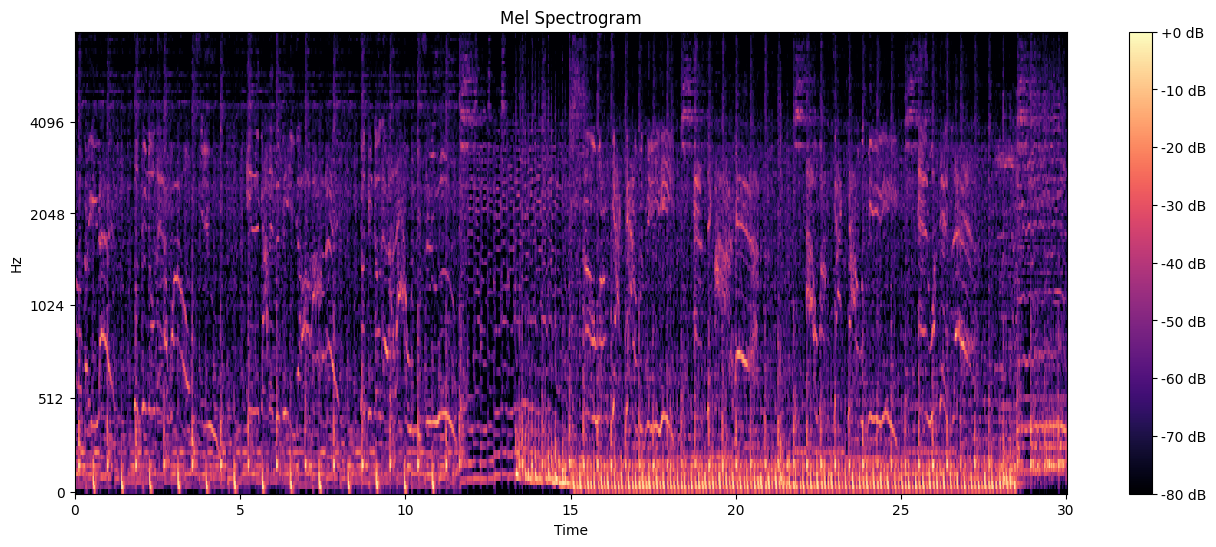

In [18]:
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to dB
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()



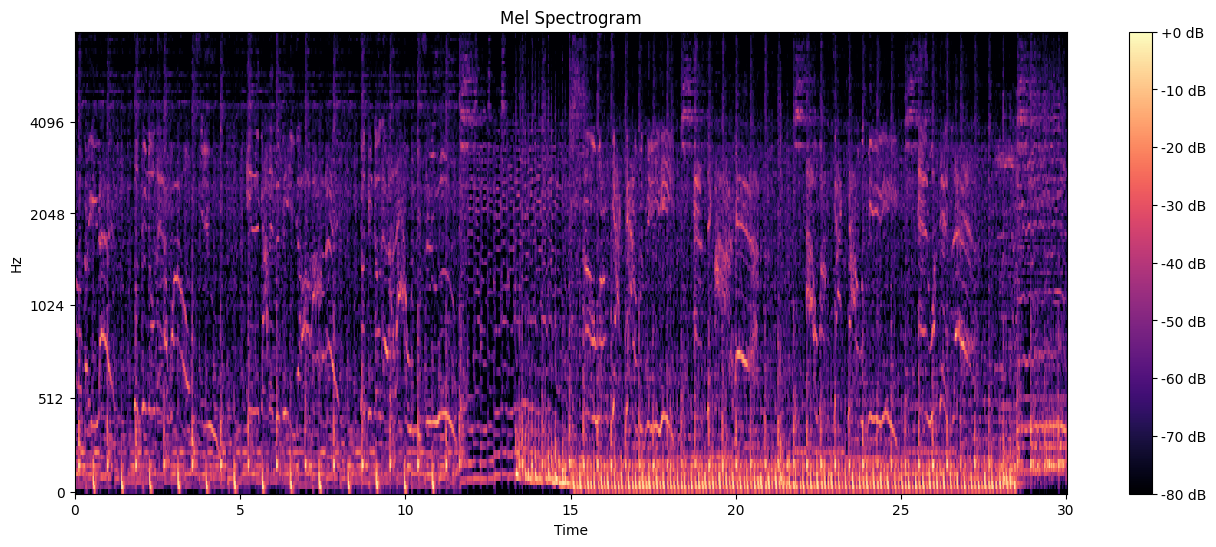

In [20]:
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to dB
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, x_axis="time", y_axis="mel", fmax=8000)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()

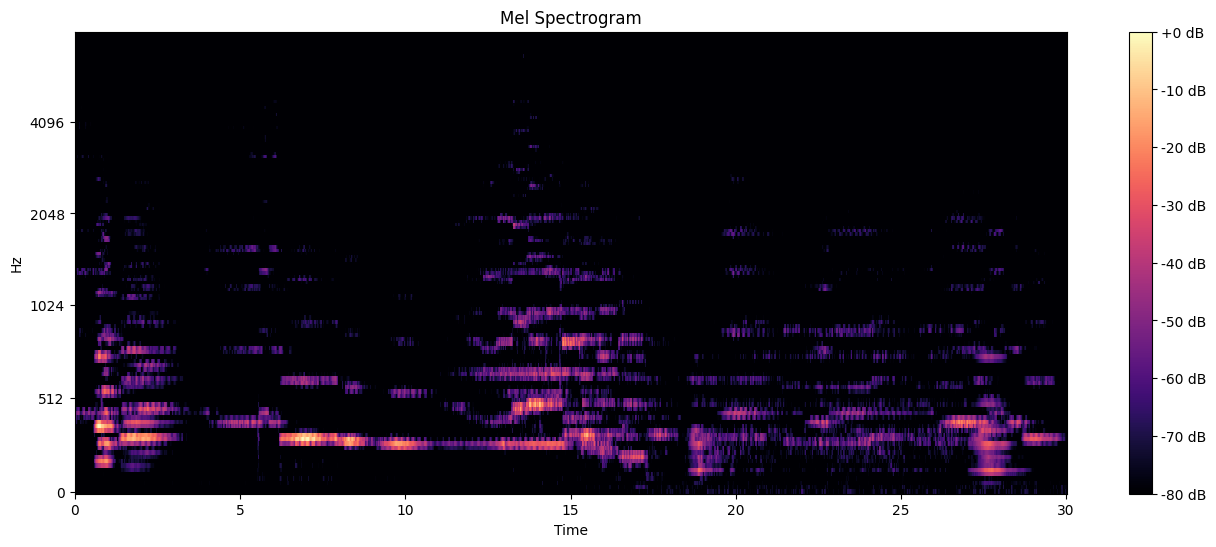

In [21]:
y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to dB
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, x_axis="time", y_axis="mel", fmax=8000)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()

Text(0.5, 0.92, '3D Spectrogram')

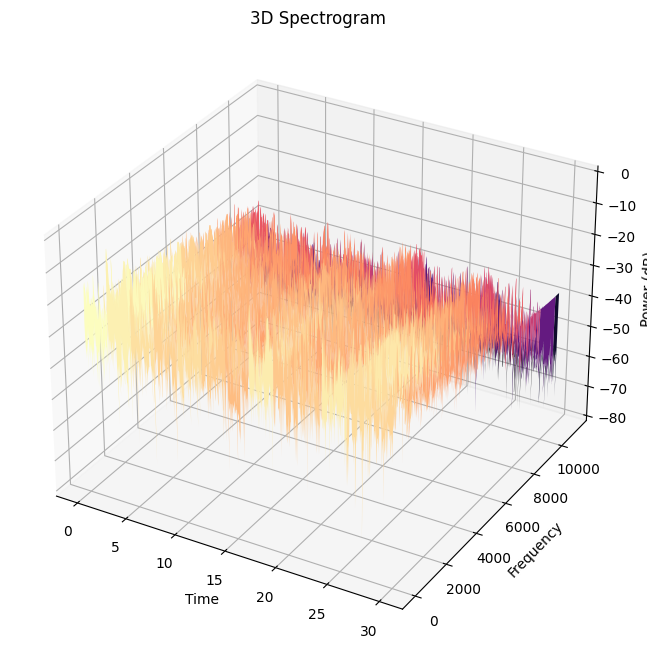

In [36]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(12, 8))
X, Y = np.meshgrid(np.linspace(0, audio_file.shape[-1]/sr, num=D.shape[1]), np.linspace(0, 0.5 * sr, num=D.shape[0]))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, librosa.power_to_db(D, ref=np.max), rstride=100, cstride=100, cmap='magma')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_zlabel('Power (dB)')
plt.title('3D Spectrogram')

MFCCs shape: (13, 1293)


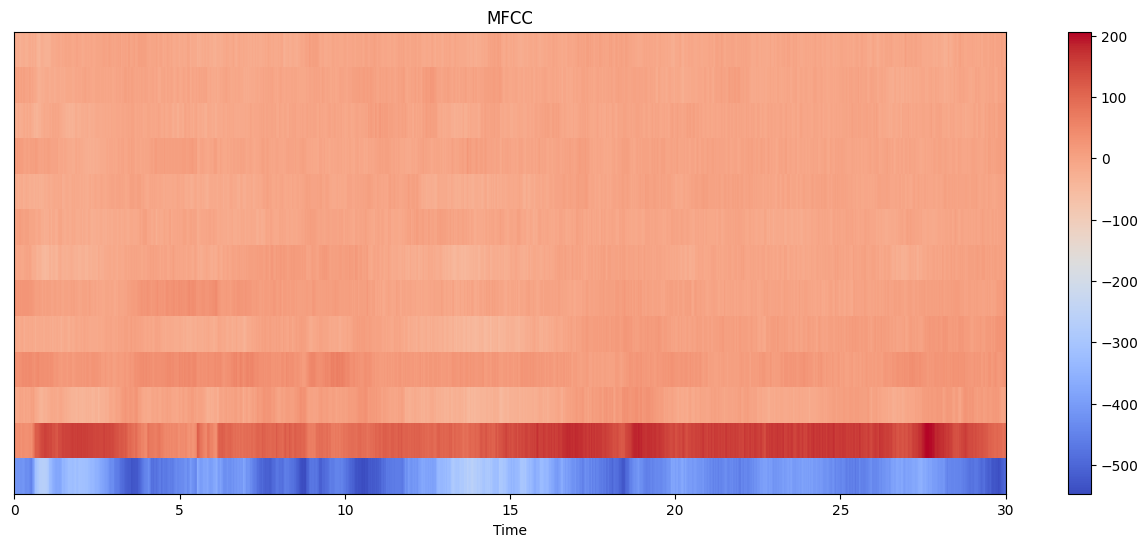

In [23]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print("MFCCs shape:", mfccs.shape)

# Plot MFCCs
plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar()
plt.title("MFCC")
plt.show()

Mean: 6.808312e-09 

Var: 1.0


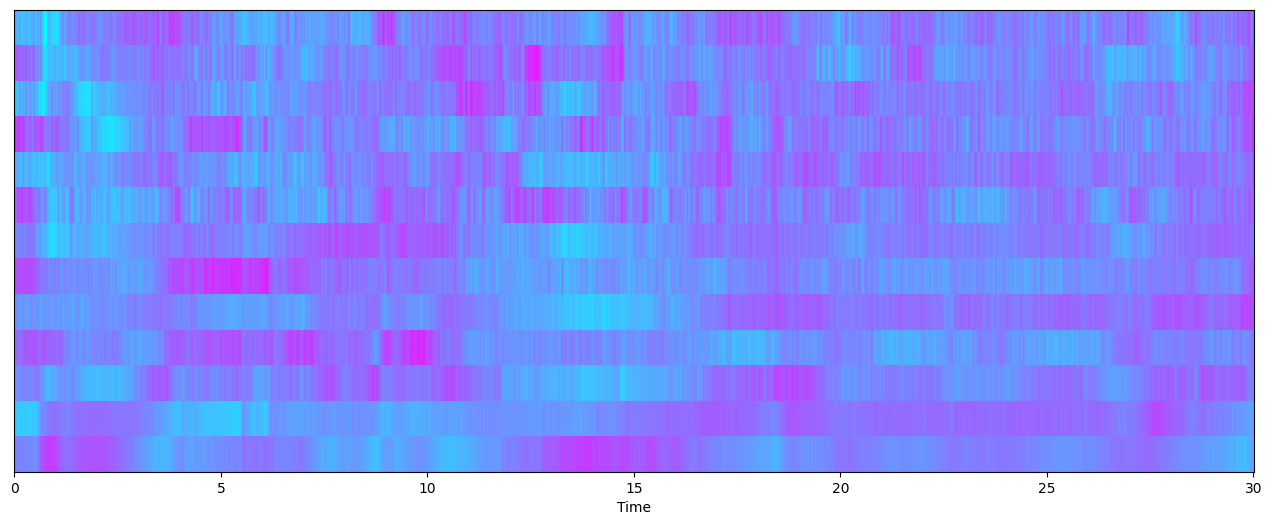

In [24]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Chromagram shape: (12, 1293)


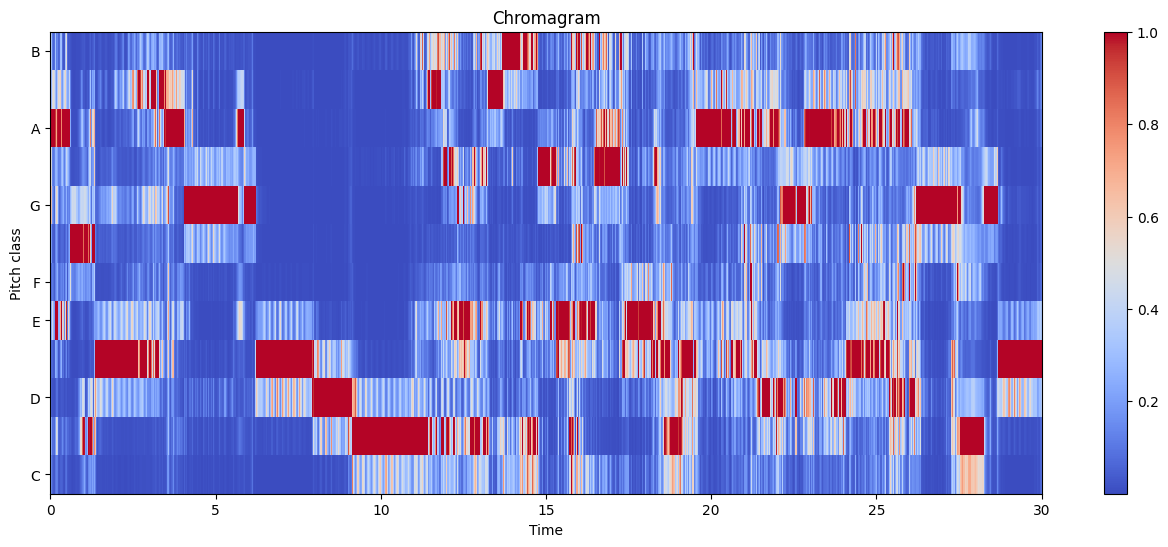

In [28]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)

print("Chromagram shape:", chromagram.shape)

# Plot chromagram
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis="time", y_axis="chroma", hop_length=hop_length, sr=sr, cmap="coolwarm")
plt.colorbar()
plt.title("Chromagram")
plt.show()

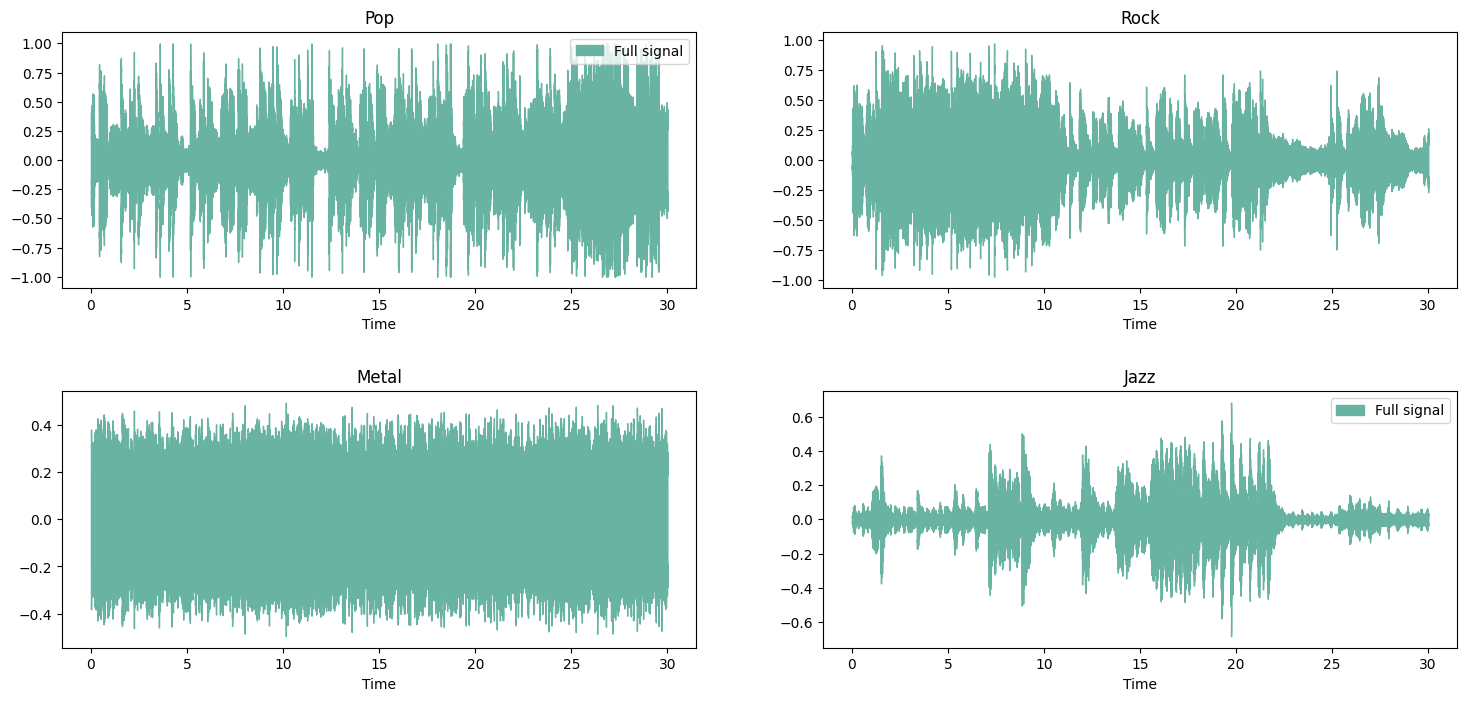

In [35]:
DIR_ = "../input/gtzan-dataset-music-genre-classification/Data/genres_original"
y1, sr = librosa.load(f'{DIR_}/pop/pop.00000.wav')
y1_harm, y1_perc = librosa.effects.hpss(y1) # get the percussive pop
y2, sr = librosa.load(f'{DIR_}/rock/rock.00000.wav')
y3, sr = librosa.load(f'{DIR_}/metal/metal.00000.wav')
y4, sr= librosa.load(f'{DIR_}/jazz/jazz.00000.wav')


fig, ax = plt.subplots(2,2, figsize=(18, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
ax[0,0].set(title="Pop")
ax[0,1].set(title="Rock")
ax[1,0].set(title="Metal")
ax[1,1].set(title="Jazz")
librosa.display.waveshow(y1, sr=sr, ax=ax[0,0], marker='.', color="#69b3a2", label = "Full signal")
librosa.display.waveshow(y2, sr=sr, ax=ax[0,1], marker='.', color="#69b3a2")
librosa.display.waveshow(y3, sr=sr, ax=ax[1,0], marker='.', color="#69b3a2")
librosa.display.waveshow(y4, sr=sr, ax=ax[1,1], marker='.', color="#69b3a2", label = "Full signal")
ax[0,0].legend()
ax[1,1].legend()

EDA

In [26]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


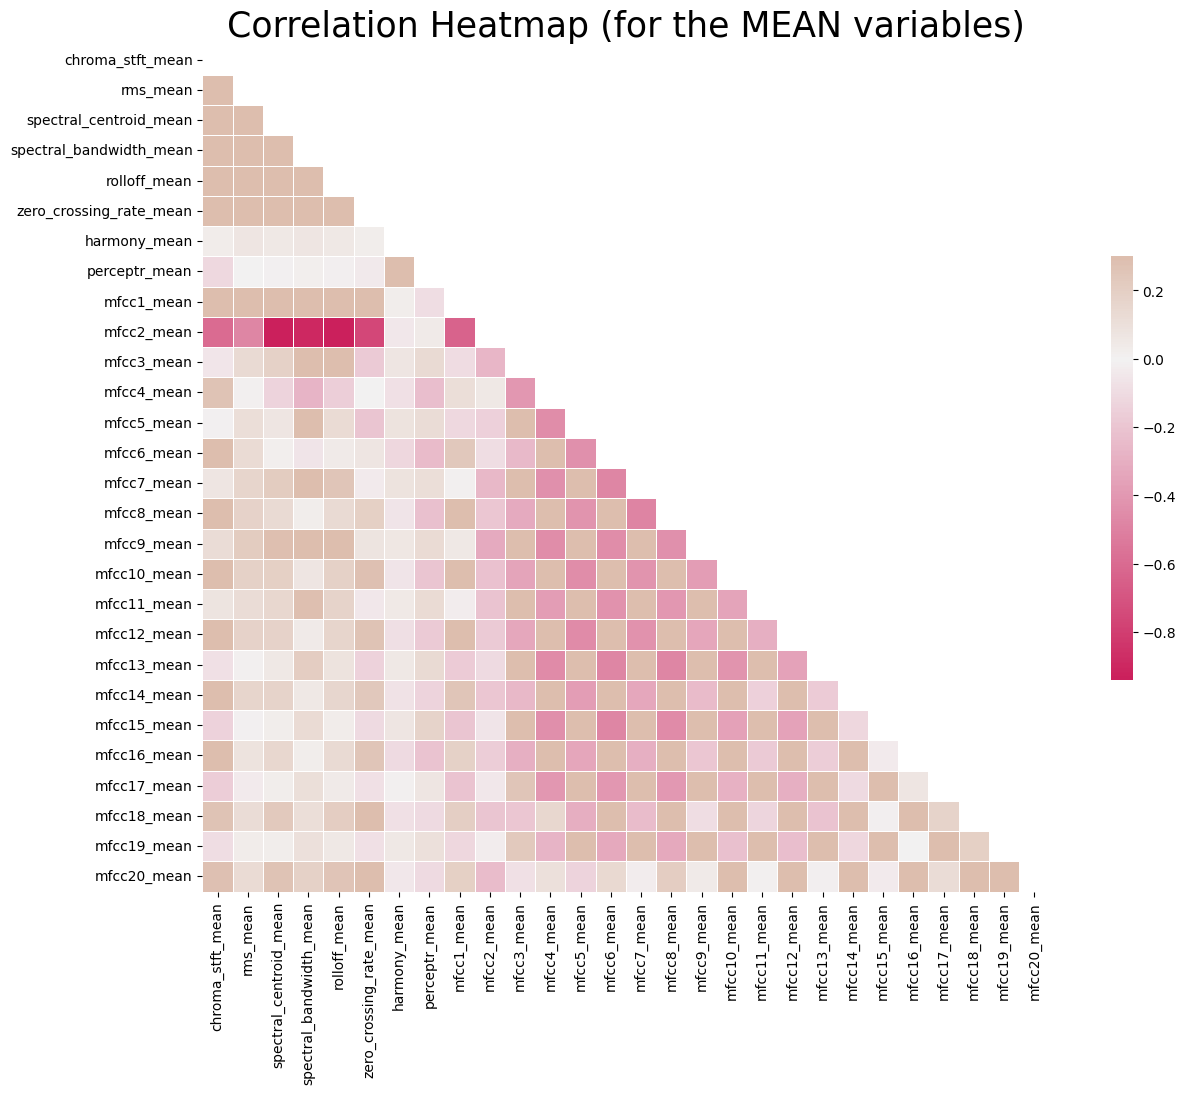

In [29]:
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

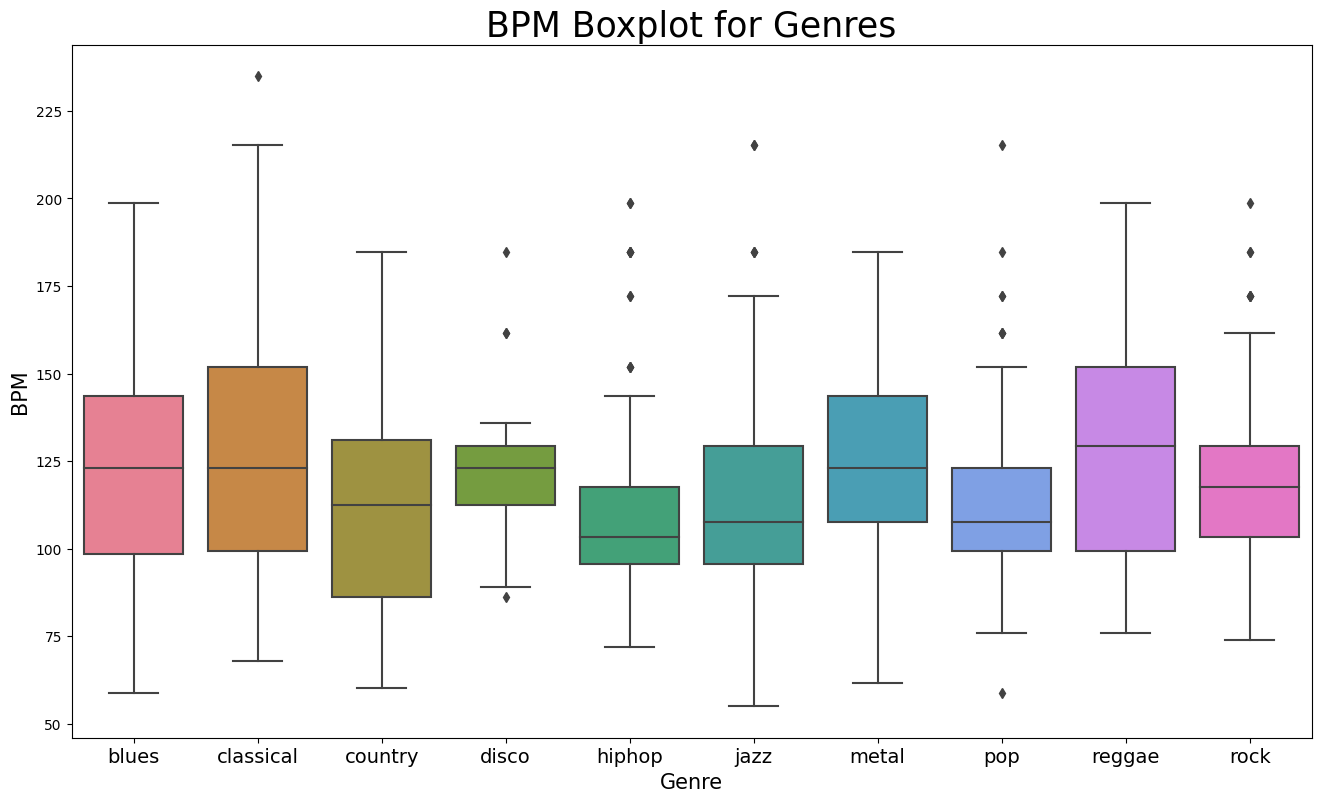

In [30]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

In [32]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.24644968, 0.22028192])

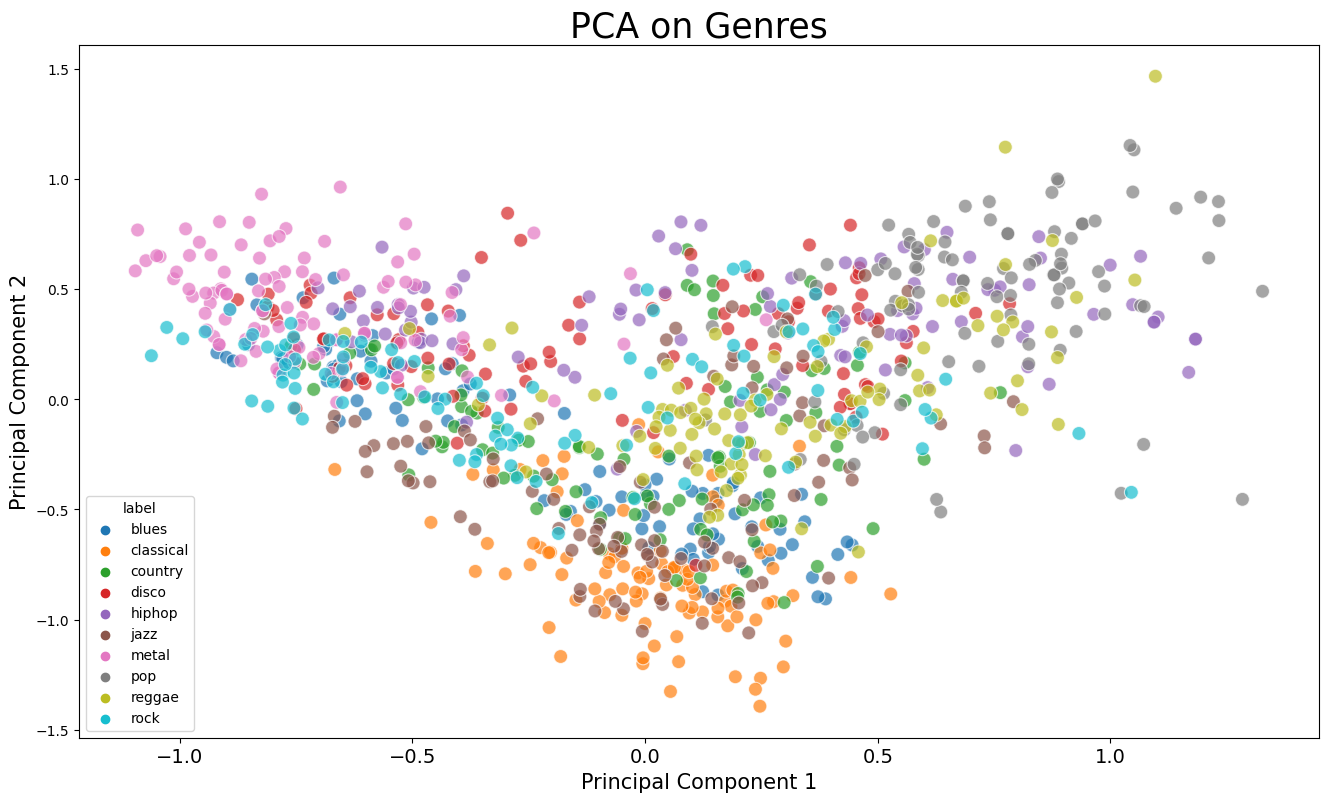

In [33]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")